C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\pyqtgraph\colors\palette.py:1: RuntimeWarning: PyQtGraph supports Qt version >= 5.15, but 5.9.7 detected.
  from ..Qt import QtGui


E:\pyWorkSpace\pyWorkSpace\single_FS
Friedman 14.5008
cd 2.5314
Friedman 13.9184
cd 2.5314
Friedman 11.2611
cd 2.5314
Friedman 16.6732
cd 2.5314


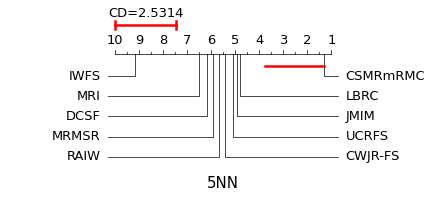

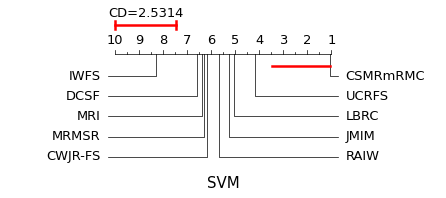

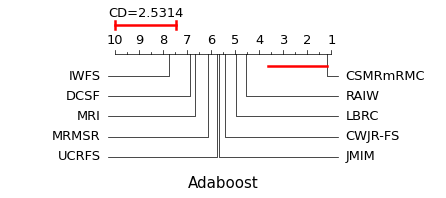

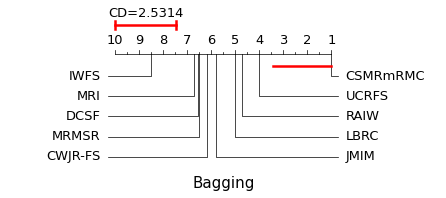

In [1]:
import Orange
import Friedman as fd
import numpy as np
from loadData import *
from graph_ranks import *
 
FSTpye = ['IWFS50','JMIM50','MRI50','DCFS50','UCRFS50','RAIW50','CWJR-FS50','LBRC50','MRMSR50','CSMRmRMC5_1']
NameTpye = ['IWFS','JMIM','MRI','DCSF','UCRFS','RAIW','CWJR-FS','LBRC','MRMSR','CSMRmRMC']
Tpye='CSMRmRMC3'
dataset = ['Dermatology','FeatMIAS','Flags','Ionosphere','Movement_libras','Synthetic_control','Waveform'
 ,'Isolet' ,'ORL','Orlraws10P','Pixraw10P','TOX_171','WarpAR10P','WarpPIE10P','Yale','analcatdata_authorship'
,'mfeat_factors','mfeat-pixel','SRBCT', 'Sorlie','Su', 'Tian']

ClaName = ['Naïve Bayes','3NN','C4.5','SVM','Adaboost','Random forest','Bagging','5NN','10NN']
Classifier = ['nb','knn','C4.5','svm','ab','rf','bg','5nn','10nn']
claidx = [7,3,4,6]
claCount = len(Classifier)
TpyeCount = len(FSTpye)

rank = []
dateCount = len(dataset)
nfea = np.zeros(dateCount)

ACC ={}
for i in range(dateCount):
    claCount = len(Classifier)
    file = './evaldata/'+dataset[i]
    idx_file = file+'/' + FSTpye[0] + '/' + 'ACC.bat'
    acc_temp = np.fromfile(file=idx_file, dtype=np.float64)
#     print(len(acc_temp)/7)
#     if (len(acc_temp)/10)%claCount != 0:
#         claCount = 7
    nfea = int(len(acc_temp)/(claCount*10))
    ACC[i] = np.zeros((4,TpyeCount, 10, nfea))
    
    for j in range(TpyeCount):
        claCount = len(Classifier)
        file = './evaldata/'+dataset[i]
        idx_file = file+'/' + FSTpye[j] + '/' + 'ACC.bat'
        acc_temp = np.fromfile(file=idx_file, dtype=np.float64)
#         if (len(acc_temp)/10)%claCount != 0:
#             claCount = 7
        ACC[i][:,j,:,:] = np.fromfile(file=idx_file, dtype=np.float64).reshape(claCount, 10, nfea)[claidx,:,:]
#         print(dataset[i],FSTpye[j],ACC[i][:,j,:,:].ravel())
# print(ACC[i][:,:,:,:])
for i in range(4):
    matrix = np.zeros((TpyeCount,dateCount))
    for j in range(dateCount):
        for k in range(TpyeCount):
#             print(i,dataset[j],FSTpye[k],ACC[j][i,k,:,:])
            matrix[k,j] = np.mean(ACC[j][i,k,:,:])
#     print(matrix)       
    matrix_r = fd.rank_matrix(matrix.T)
    
    avranks = np.mean(matrix_r,axis=0)
    from scipy.stats import f
    
    critical1=f.ppf(0.95,10,22)
    Friedman = fd.friedman(22, 10, matrix_r)
    print('Friedman %.4f'%(Friedman))
#     cd = fd.nemenyi(22, 10,2.773)
    ##画CD图
    cd = 2.5314
#     cd = Orange.evaluation.compute_CD(avranks, 22, alpha='0.05', test='bonferroni-dunn') #tested on 30 datasets
    print('cd',cd)
#     print(avranks, FSName)
    filename="E:/experiment/csFS3-2/cs3 - 5/cd_figure_"+Tpye+"_"+Classifier[claidx[i]]+".eps"
    graph_ranks(avranks, NameTpye ,cd=cd, width=6, textspace=1.5,reverse=True,titName=ClaName[claidx[i]],filename=filename)
    
    rank.append(avranks)

In [2]:
for i in range(len(FSTpye)):
#     print((rank[0][i]+rank[1][i]+rank[2][i]+rank[3][i]))
    ave = (rank[0][i]+rank[1][i]+rank[2][i]+rank[3][i])/4
    print(NameTpye[i],'& %.2f & %.2f & %.2f & %.2f & %.2f \\\\'%(rank[0][i],rank[1][i],rank[2][i],rank[3][i],ave))
        

IWFS & 9.18 & 8.32 & 7.77 & 8.50 & 8.44 \\
JMIM & 4.91 & 5.27 & 5.68 & 5.82 & 5.42 \\
MRI & 6.50 & 6.36 & 6.68 & 6.73 & 6.57 \\
DCSF & 6.18 & 6.59 & 6.86 & 6.55 & 6.55 \\
UCRFS & 5.09 & 4.18 & 5.77 & 4.00 & 4.76 \\
RAIW & 5.68 & 5.68 & 4.55 & 4.73 & 5.16 \\
CWJR-FS & 5.41 & 6.18 & 5.41 & 6.18 & 5.80 \\
LBRC & 4.82 & 5.05 & 4.95 & 5.00 & 4.95 \\
MRMSR & 5.91 & 6.32 & 6.14 & 6.50 & 6.22 \\
CSMRmRMC & 1.32 & 1.05 & 1.18 & 1.00 & 1.14 \\


In [ ]:
import Orange
import Friedman as fd
import numpy as np
from loadData import *
from graph_ranks import *

FSTpye = ['MRMR50','CIFE50','JMIM50','IWFS50','MRI50','CFR50','DCFS50','MRMD50','UCRFS50',#0-8
        'CSMRmRMC2_50_1']
FSName = ['mRMR','CIFE','JMIM','IWFS','MRI','CFR','DCFS','MRMD','UCRFS',#0-8
          'CSMDCCMR']
Tpye='CSMRmRMC2'
# dataset = [
# 'dermatology','featMIAS','movement_libras','musk1','Synthetic_control','waveform','wdbc' ,'wine','arcene'
# ,'CLL_SUB_111' ,'GLIOMA','Isolet','ORL','orlraws10P' ,'Pixraw10P','Prostate_GE','TOX_171','warpAR10P','WarpPIE10P'
# ,'Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel', 'sorlie','su']
ClaName = ['NaiveBayes','3NN','C4.5','SVM','Adaboost','RandomForest','Bagging']
Classifier = ['nb','knn','C4.5','svm','ab','rf','bg']
claidx = [0,1,3,5]
claCount = len(Classifier)
TpyeCount = len(FSTpye)

rank = []
dateCount = len(dataset)
nfea = np.zeros(dateCount)

ACC ={}
for i in range(dateCount):
    file = './evaldata/'+dataset[i]
    idx_file = file+'/' + FSTpye[0] + '/' + 'ACC.bat'
    temp_acc = np.fromfile(file=idx_file, dtype=np.float64)
    nfea = int(len(temp_acc)/(claCount*10))
    ACC[i] = np.zeros((4,TpyeCount, 10, nfea))
    
    for j in range(TpyeCount):
        file = './evaldata/'+dataset[i]
        idx_file = file+'/' + FSTpye[j] + '/' + 'ACC.bat'
        temp_acc = np.fromfile(file=idx_file, dtype=np.float64)
        ACC[i][:,j,:,:] = np.fromfile(file=idx_file, dtype=np.float64).reshape(claCount, 10, nfea)[claidx,:,:]
matrix = np.zeros((TpyeCount,dateCount))
for j in range(dateCount):
    for k in range(TpyeCount):
        matrix[k,j] = np.mean(ACC[j][:,k,:,:])
matrix_r = fd.rank_matrix(matrix.T)
    
avranks = np.mean(matrix_r,axis=0)
from scipy.stats import f
    
critical1=f.ppf(0.95,10,15)
Friedman = fd.friedman(15, 10, matrix_r)
print('Friedman %.4f'%(Friedman))
    ##画CD图
cd = 3.0657
print('cd',cd)
filename="C:/Users/xuhao/Desktop/experiment/csFS3-2/cs2/cd_figure_"+Tpye+".eps"
graph_ranks(avranks, FSName ,cd=cd, width=6, textspace=1.5,reverse=True,filename=filename)
rank.append(avranks)

CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_GEN
POSCSR_1
MICSR_1
CSMRmRMC2_50_1
CS_CFS_BF
CS_CFS_GEN
CS_CON_BF
CS_CON_

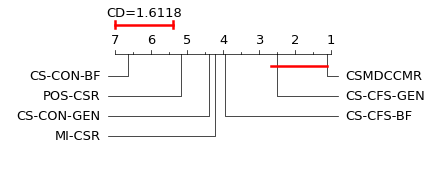

In [4]:
import Orange
import Friedman as fd
import numpy as np
from loadData import *
from graph_ranks import *

FSTpye = ['CS_CFS_BF','CS_CFS_GEN','CS_CON_BF','CS_CON_GEN','POSCSR_1','MICSR_1',#0-8
        'CSMRmRMC2_50_1']
NameTpye = ['CS-CFS-BF','CS-CFS-GEN','CS-CON-BF','CS-CON-GEN','POS-CSR','MI-CSR',#0-8
          'CSMDCCMR']
Tpye='CSMRmRMC2'
dataset = [
'dermatology','featMIAS','movement_libras','musk1','Synthetic_control','waveform','wdbc' ,'arcene'
,'CLL_SUB_111' ,'GLIOMA','Isolet','ORL','orlraws10P' ,'Pixraw10P','Prostate_GE','TOX_171','warpAR10P','WarpPIE10P'
,'Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel', 'sorlie','su','yeoh']
ClaName = ['NaiveBayes','3NN','C4.5','SVM','Adaboost','RandomForest','Bagging']
Classifier = ['nb','knn','C4.5','svm','ab','rf','bg']
claidx = [0,1,3,5]
claCount = len(Classifier)
TpyeCount = len(FSTpye)

rank = []
dateCount = len(dataset)
nfea = np.zeros(dateCount)

ACC ={}
for i in range(dateCount):
    file = './evaldata/'+dataset[i]
    idx_file = file+'/' + FSTpye[-1] + '/' + 'ACC.bat'
    temp_acc = np.fromfile(file=idx_file, dtype=np.float64)
    nfea = int(len(temp_acc)/(claCount*10))
    ACC[i] = np.zeros((4,TpyeCount, 10))
#     print(idx_file,len(temp_acc))
    for j in range(TpyeCount):
        print(FSTpye[j])
        file = './evaldata/'+dataset[i]
        idx_file = file+'/' + FSTpye[j] + '/' + 'ACC.bat'
        temp_acc = np.fromfile(file=idx_file, dtype=np.float64)
        if j >= 6:
#             if nfea >= 50:
#                 nfea = 50
#             else:
#                 nfea = int(0.5*nfea)
#             ACC[i][:,j,:] = temp_acc.reshape(7, 10,-1)[claidx,:,nfea-1]
            nfea = [29, 18, 27, 46, 41, 22, 11, 48, 41, 42, 49, 32, 11, 13, 21, 31, 50, 33, 49, 45, 47, 50, 44, 38, 36]
            ACC[i][:,j,:] = temp_acc.reshape(9, 10,-1)[claidx,:,nfea[i]-1]
        else:
#             print(temp_acc)
            ACC[i][:,j,:] = temp_acc.reshape(-1, 10)[claidx,:]

matrix = np.zeros((TpyeCount,dateCount))
for j in range(dateCount):
    for k in range(TpyeCount):
        matrix[k,j] = np.mean(ACC[j][:,k,:])
matrix_r = fd.rank_matrix(matrix.T)
    
avranks = np.mean(matrix_r,axis=0)
from scipy.stats import f
    
critical1=f.ppf(0.95,7,25)
Friedman = fd.friedman(25, 7, matrix_r)
print('Friedman %.4f'%(Friedman))

# cd = fd.nemenyi(25, 7,2.638)
    ##画CD图
cd = 1.6118
# print('cd',cd)
# cd = Orange.evaluation.compute_CD(avranks, 25, alpha='0.05', test='bonferroni-dunn') #tested on 30 datasets
print('cd',cd)
#     print(avranks, FSName)
# filename = None
filename="C:/Users/xuhao/Desktop/experiment/csFS3-2/cs2 - 1/cd_figure_"+Tpye+"_cs.eps"
graph_ranks(avranks, NameTpye ,cd=cd, width=6, textspace=1.5,reverse=True,filename=filename)
# rank.append(avranks)

In [5]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.font_manager import FontProperties

#数据准备
dataName = ['Der','Fea','Mov','Mus','Sem' ,'Wav','Wdb','Arc','Iso'
            ,'WAR','WPI','Yal' ,'Aut','Fac','Pix']
labels = dataName
stats = np.zeros((7,15))
for j in range(7):
    for i in range(len(dataset)):
        stats[j,i]=np.mean(ACC[i][:,j,:])
# print(stats,stats[:,0])
angles = np.linspace(0,2*np.pi,len(labels),endpoint=False)
stats =np.concatenate((stats,stats[:,0].reshape(-1,1)),axis=1)
for i in range(len(angles)):
    angles[i] = angles[i]+0.1
# print(angles)
angles=np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))
# matplotlib
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,polar=True)
for j in range(6):
    ax.plot(angles,stats[j,:],'o-',linewidth=2, label=NameTpye[j])
ax.plot(angles,stats[6,:],'o-',linewidth=2, label=NameTpye[6],color='black')

ax.set_thetagrids(angles*180/np.pi,labels)
plt.legend(loc='best',bbox_to_anchor=(1.2,0.3,0.,0.8),framealpha=0.1,edgecolor='blue')

plt.savefig('C:/Users/xuhao/Desktop/experiment/csFS3-2/cs2/Spider.eps')
# ax.fill(angles,stats,alpha=0.25)
# 设置中文字体

# font = FontProperties(fname="/System/Library/Fonts/STHeiti Medium.ttc",size=14)

# ax.set_thetagrids(angles*180/np.pi,labels,FontProperties=font)

IndexError: index 15 is out of bounds for axis 1 with size 15